In [97]:
import pandas as pd
import numpy as np
import itertools

In [ ]:
def filter_df(df_raw):
    new_columns = df_raw.columns + " " + df_raw.iloc[0] + " " + df_raw.iloc[1]
    df_filt = df_raw.copy()
    df_filt.columns = new_columns
    df_filt = df_filt.drop([0, 1]).reset_index(drop=True)
    df_filt.head()
    df = df_filt.apply(pd.to_numeric)
    return df

Node 83 is on the top (= Node 332)

Node 156 is on the side (= Node 359)

In [118]:
data_folder = "Data/"
health_status = ["imperfect","perfect"]
structure_status = ["Long","Short"]
force_status = ["1","2"]
combinations = list(itertools.product(health_status,structure_status,force_status))
name_assignment = {
    "Unnamed: 0 X 0.": "time",
    "_U:Magnitude PI: PART-1-1 N: 83 0.": "mag_top",
    "_U:Magnitude PI:.1 PART-1-1 N: 156 0.": "mag_side",
    "_U:U1 PI: PART-1- 1 N: top 0.": "x_top",
    "_U:U2 PI: PART-1- 1 N: top 0.": "y_top",
    "_U:U3 PI: PART-1- 1 N: top 0.": "z_top",
    "_U:U1 PI: PART-1-.1 1 N: side 0.": "x_side",
    "_U:U2 PI: PART-1-.1 1 N: side 0.": "y_side",
    "_U:U3 PI: PART-1-.1 1 N: side 0.": "z_side",
}
def get_df(health, structure, force):
    file = f"class_{1 if health=="imperfect" else 0}_{health}_structure\Displacement_{structure}_Structure_{force}MN_Force.rpt"
    df = pd.read_fwf(data_folder+file)
    df = filter_df(df)
    df.columns = name_assignment.values()

    # Add feature as column
    if health == "imperfect":
        df["health"] = pd.Series(np.zeros_like(df.index))
    elif health == "perfect":
        df["health"] = pd.Series(np.ones_like(df.index))

    if structure == "Long":
        df["structure"] = pd.Series(np.ones_like(df.index))
    elif structure == "Short":
        df["structure"] = pd.Series(np.zeros_like(df.index))
    
    df["force"] = pd.Series(int(force)*np.ones_like(df.index))

    return df

dfs = []
for type in combinations:
    df = get_df(*type)
    dfs.append(df)
df = pd.concat(dfs)
df

<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
C:\Users\meneu\AppData\Local\Temp\ipykernel_18420\2210365886.py:18: SyntaxWarning: invalid escape sequence '\D'
  file = f"class_{1 if health=="imperfect" else 0}_{health}_structure\Displacement_{structure}_Structure_{force}MN_Force.rpt"


,time,mag_top,mag_side,x_top,y_top,z_top,x_side,y_side,z_side,health,structure,force
0,0.04,0.003779,0.003049,0.003779,0.002734,-0.000001,-0.000005,0.000008,0.001350,0,1,1
1,0.08,0.007556,0.006097,0.007556,0.005467,-0.000002,-0.000010,0.000016,0.002700,0,1,1
2,0.12,0.011332,0.009144,0.011332,0.008198,-0.000003,-0.000016,0.000026,0.004049,0,1,1
3,0.16,0.015106,0.012189,0.015106,0.010928,-0.000004,-0.000021,0.000036,0.005398,0,1,1
4,0.20,0.018879,0.015232,0.018879,0.013657,-0.000005,-0.000026,0.000048,0.006746,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.84,0.013274,0.017701,-0.012151,-0.017694,-0.000040,-0.000050,-0.005345,0.000470,1,0,2
96,3.88,0.009895,0.013273,-0.009113,-0.013265,-0.000035,-0.000042,-0.003855,0.000471,1,0,2
97,3.92,0.006521,0.008850,-0.006077,-0.008837,-0.000029,-0.000033,-0.002366,0.000473,1,0,2
98,3.96,0.003167,0.004438,-0.003042,-0.004413,-0.000023,-0.000025,-0.000879,0.000477,1,0,2


# Inspect

<Axes: xlabel='time', ylabel='health'>

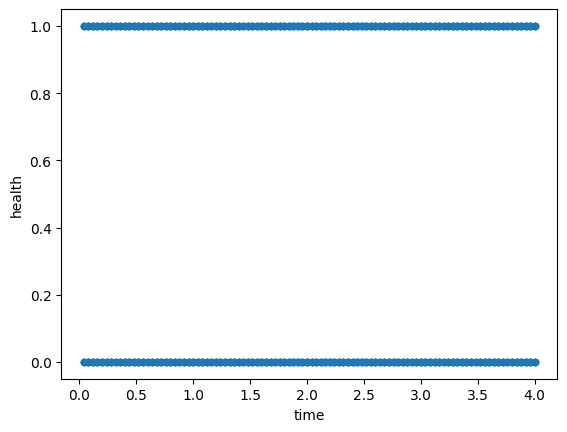

In [127]:
df.plot(x="time", y="health", kind="scatter")

<Axes: xlabel='time', ylabel='mag_top'>

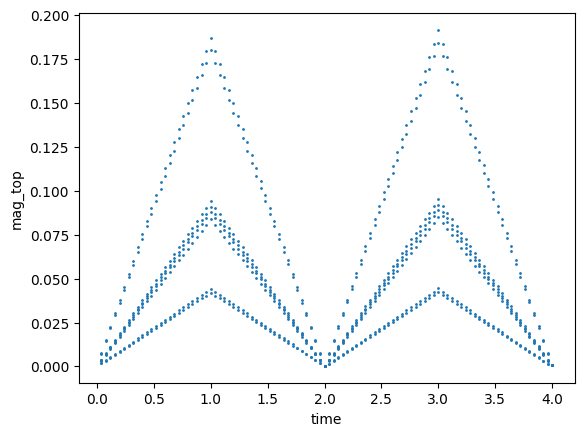

In [134]:
df.plot(x="time", y="mag_top", kind="scatter", s=1)

# Data normalization